In [50]:
import json

with open('stadtkreise.json') as json_file:
    stadtkreise = json.load(json_file)

def set_ID(kreis):
    for i in range(len(kreis['features'])):
        kreis['features'][i]['id'] = kreis['features'][i]['properties']['name']
    return kreis

stadtkreise = set_ID(stadtkreise)

In [51]:
stadtkreise['features'][0] ['geometry']['coordinates'][0]   # Last [0] inutile => list in a list in a list

[[8.5488505541, 47.3660199439],
 [8.549008312, 47.366011339],
 [8.5490343957, 47.365985344],
 [8.5490662944, 47.3659836341],
 [8.5490685511, 47.3659834655],
 [8.5490707975, 47.3659831919],
 [8.5490730287, 47.3659828139],
 [8.5490751781, 47.3659823472],
 [8.5490773041, 47.3659817836],
 [8.5490794024, 47.3659811243],
 [8.5490813401, 47.3659804288],
 [8.5490832363, 47.3659796272],
 [8.5490850852, 47.3659787219],
 [8.549086776, 47.3659777785],
 [8.5490884154, 47.3659767483],
 [8.549089999, 47.3659756343],
 [8.5493297502, 47.3659460465],
 [8.5493754238, 47.3659350739],
 [8.5493734425, 47.3659308472],
 [8.5494984108, 47.365900276],
 [8.5495006683, 47.36590441],
 [8.54956276, 47.3658890337],
 [8.5495574659, 47.365878956],
 [8.5496645671, 47.3658525144],
 [8.5496543722, 47.3658334437],
 [8.5497278485, 47.3658154571],
 [8.5498144232, 47.3657938723],
 [8.5498402907, 47.3657876988],
 [8.5498662141, 47.3657817644],
 [8.5498921911, 47.3657760695],
 [8.5499183847, 47.3657705809],
 [8.5499446281, 47.

> Find out in which Kreis the Store is from the coordinates:

In [52]:
stadtkreise['features'][0]['id']

'7'

In [53]:
from shapely.geometry import Point, Polygon

11


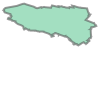

In [64]:
size_stadtkreise = len(stadtkreise['features'])

# Covert list of lists to list of touples:
for i_kreis in range(size_stadtkreise):
    coords_list = []
    for coord in stadtkreise['features'][i_kreis]['geometry']['coordinates'][0]:
        lng = coord[0]
        lan = coord[1]
        coords_list.append((lng, lan))
    stadtkreise['features'][i_kreis]['polygone'] = Polygon(coords_list)


# How it looks like:
print(stadtkreise['features'][1]['id'])
stadtkreise['features'][1]['polygone']

In [55]:
def find_Kreis(lng_store, lat_store):
    point = Point(lng_store, lat_store)
    
    for i_kreis in range(size_stadtkreise):
        poly = stadtkreise['features'][i_kreis]['polygone']
        if point.within(poly):
            return stadtkreise['features'][i_kreis]['id']
    return '-'

In [57]:
import pandas as pd

df = pd.read_csv('migros_modified.csv')
df.head()

,Unnamed: 0,address,name,rating,nr_users_rating,lat,lng
0,0,"Badenerstrasse 376, 8004 Zürich, Switzerland",Migros Supermarkt,4.1,463,47.379105,8.508754
1,1,"Birmensdorferstrasse 140, 8003 Zürich, Switzer...",Migros Supermarkt,4.2,636,47.370066,8.520107
2,2,"Birmensdorferstrasse 320, 8055 Zürich, Switzer...",Migros Supermarkt,4.3,520,47.369956,8.508721
3,3,"Etzelstrasse 3, 8038 Zürich, Switzerland",Migros Supermarkt,4.3,616,47.344706,8.529962
4,4,"Falkenstrasse 19 - 21, 8008 Zürich, Switzerland",Migros,4.2,419,47.365446,8.547967


In [60]:
set_id = lambda row: find_Kreis(row.lng, row.lat)

df['Kreis_id'] = df[['lat', 'lng']].apply(set_id, axis=1)

In [61]:
df

,Unnamed: 0,address,name,rating,nr_users_rating,lat,lng,Kreis_id
0,0,"Badenerstrasse 376, 8004 Zürich, Switzerland",Migros Supermarkt,4.1,463,47.379105,8.508754,4
1,1,"Birmensdorferstrasse 140, 8003 Zürich, Switzer...",Migros Supermarkt,4.2,636,47.370066,8.520107,3
2,2,"Birmensdorferstrasse 320, 8055 Zürich, Switzer...",Migros Supermarkt,4.3,520,47.369956,8.508721,3
3,3,"Etzelstrasse 3, 8038 Zürich, Switzerland",Migros Supermarkt,4.3,616,47.344706,8.529962,2
4,4,"Falkenstrasse 19 - 21, 8008 Zürich, Switzerland",Migros,4.2,419,47.365446,8.547967,1
5,5,"Hardturmstrasse 11, 8005 Zürich, Switzerland",Migros Supermarkt,4.3,227,47.391336,8.518553,5
6,6,"Hauptbahnhof, 8001 Zürich, Switzerland",Migros Superm.,4.2,1811,47.377507,8.539468,1
7,7,"Hohlstrasse 600, 8048 Zürich, Switzerland",Migros Supermarkt,4.2,537,47.391297,8.487764,9
8,8,"Jonas-Furrer-Strasse 21, 8046 Zürich, Switzerland",Migros Supermarkt,4.2,858,47.420064,8.508500,11
9,9,"Limmatstrasse 152, 8005 Zürich, Switzerland",Migros Supermarkt,4.4,1645,47.385463,8.531409,5
